## Check for class imbalance

In [327]:
df['Churn'].value_counts()

Nee    77281
Ja      6269
Name: Churn, dtype: int64

#### Er is een vrij grote class imbalance
Ongeveer 92 procent van de klanten is niet gechurnd, en 8 procent is wel gechurnd  
Oplossing: undersample de category Nee  

### Oplossing: Undersamplen van meest voorkomende label 

### Oplossing 1: 
https://www.migarage.ai/intelligence/imbalanced-data/

In [292]:
df.loc[:,'Churn'].value_counts()

Nee    77281
Ja      6269
Name: Churn, dtype: int64

In [302]:
# Maak 2 variabelen voor Class count
# target 1 is 'Nee', target 0 is 'Ja'
target_1_count, target_0_count = df.loc[:,'Churn'].value_counts()
target_1_label, target_0_label = df.loc[:,'Churn'].value_counts().index.to_list()

In [317]:
# Seperate classes
target_1 = df[df['Churn'] == target_1_label]
target_0 = df[df['Churn'] == target_0_label]

In [321]:
# Resample target1 to match target 0 count
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
target_1_undersampled = target_1.sample(n = target_0_count, random_state = 33)

In [322]:
# Merge back to single df
train_undersampled = pd.concat([target_1_undersampled, target_0], axis=0)

In [323]:
train_undersampled.shape

(12538, 11)

Random under-sampling:
Nee    6269
Ja     6269
Name: Churn, dtype: int64


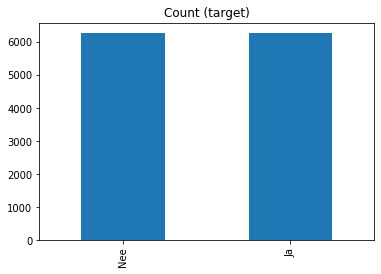

In [324]:
# Show counts and plot
print('Random under-sampling:')
print(train_undersampled['Churn'].value_counts())
train_undersampled['Churn'].value_counts().plot(kind='bar', title='Count (target)')

### Oplossing 2: imblearn package
  
https://www.kaggle.com/residentmario/undersampling-and-oversampling-imbalanced-data

Moeilijkheid zit erin dat deze oplossing met arrays werkt


In [328]:
# Split data in X (features) en y (labels)
X, y = df.drop('Churn', axis=1), df['Churn']

In [230]:
from imblearn.under_sampling import RandomUnderSampler

In [237]:
rus = RandomUnderSampler(random_state=0)

In [238]:
rus.fit(X, y)

RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')

In [241]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [242]:
X_resampled.shape

(12538, 10)

In [243]:
y_resampled.shape

(12538,)

In [252]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{'Ja': 6269, 'Nee': 6269}